# Objective

> ###  Build a model to predict the customers who are about to leave the company. With help of this model the compay can controll their customer attrition rate

### Download the data from here

link : 'https://www.kaggle.com/radmirzosimov/telecom-users-dataset'

# Available Details

> customerID - customer id 

> gender - client gender (male / female)

> SeniorCitizen - whether the client is a pensioner (1, 0)

> Partner - whether the client is married (Yes, No)

> Dependents - does the client have dependents (Yes, No)

> tenure - how many months a person has been a client of the company

> PhoneService - is the telephone service activated (Yes, No)

> MultipleLines - whether multiple telephone lines are connected (Yes, No, No phone service)

> InternetService - client's Internet provider (DSL, Fiber optic, No)

> OnlineSecurity - is the online security service enabled (Yes, No, No internet service)

> OnlineBackup - is the online backup service activated (Yes, No, No internet service)

> DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)

> TechSupport - is the technical support service activated (Yes, No, No internet service)

> StreamingTV - is the streaming TV service activated (Yes, No, No internet service)

> StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
 
> Contract - type of customer contract (Month-to-month, One year, Two year)

> PaperlessBilling - whether the client uses paperless billing (Yes, No)


> PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

> MonthlyCharges - current monthly payment

> TotalCharges - the total amount that the client has paid for the services for the entire time

> Churn - whether there was a churn (Yes or No)

In [1]:
import numpy as np
import pandas as pd

# Import data

In [2]:
data = pd.read_csv(r'C:\Users\Vishnu\Desktop\jupyter Projects\Projects\Telecom\telecom_users.csv')

# Exploratory Data Analysis

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
columns=list(data.columns)
print(f"there are totally {len(columns)} Features") 

there are totally 22 Features


In [5]:
# Out of 22, 2 features are not important so i am droping those

In [6]:
data.drop(['Unnamed: 0','customerID'],axis=1,inplace=True)

### Checking whether there is any missing values

In [7]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### First we need to change the data types. because if we have object datatype, then we will not be able to find out missing values properly

In [8]:
# Splitting the data into numerical and categorical data

categorical = data.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)
numerical = data.drop(categorical.columns,axis=1)

In [9]:
# Converting Object into categorical feature
categorical=categorical.astype('category')

# Converting Object into numerical feature
numerical=pd.to_numeric(numerical.TotalCharges)

1. We are getting this error :: " ValueError: Unable to parse string " " at position 356"
2. Which means there are some missing values in the form of strings. and we need to fix it

In [10]:
# Changing the object to categorical features
numerical.TotalCharges=numerical.TotalCharges.astype('category')

# Finding the index of missing value
missing_index1=np.where(numerical.TotalCharges==' ')

# Filling it with Nan value
numerical.TotalCharges.iloc[missing_index1]=np.nan

# Converting it into float
numerical=numerical.astype('float')

numerical.TotalCharges.isnull().sum()

10

### There are totally 10 missing values in TotalCharges column

In [11]:
# Concatinating categorical and numerical data

new_data = pd.concat([categorical,numerical],axis=1)

In [12]:
new_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Churn                0
tenure               0
MonthlyCharges       0
TotalCharges        10
dtype: int64

### Let's fill the missing values by doing some DEA

### Importing required libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr,pearsonr

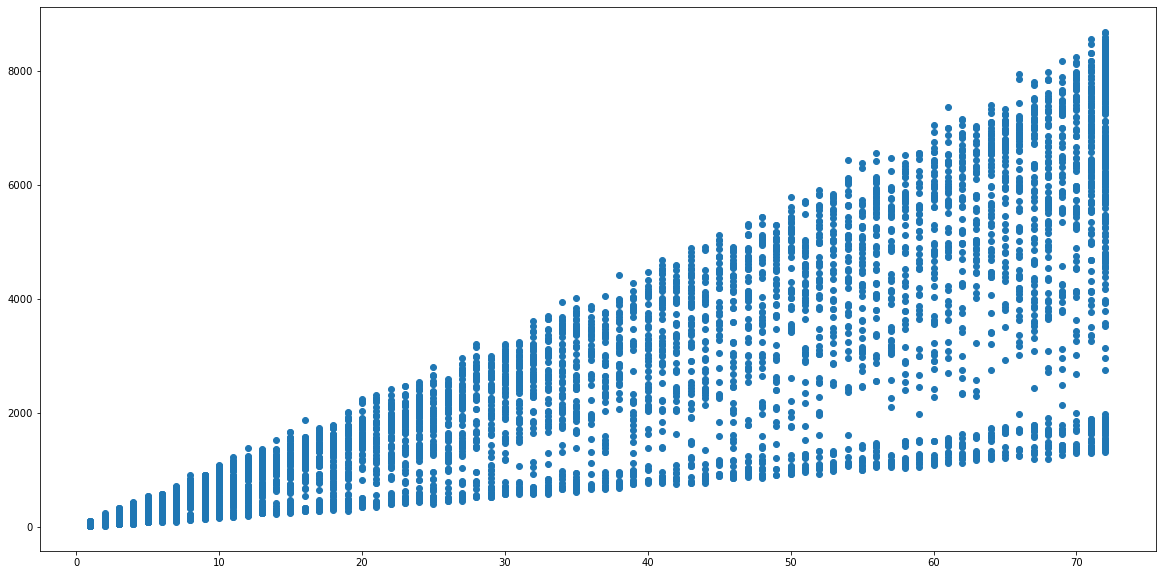

In [14]:
fig = plt.figure(figsize=(20,10))
plt.scatter(new_data.tenure,new_data.TotalCharges)

1 . There is a linear relationship between tenure and TotalCharge. So let's see can we fill missing values of TotalCharge with the help of tennure"

In [15]:
new_data.iloc[missing_index1]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
356,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),No,0.0,61.90,NaN
634,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),No,0.0,56.05,NaN
2771,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,25.35,NaN
3086,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,No,0.0,19.70,NaN
3255,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,19.85,NaN
4326,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,No,0.0,80.85,NaN
5375,Male,0,No,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,20.25,NaN
5382,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,20.00,NaN
5695,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),No,0.0,52.55,NaN
5951,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No,0.0,25.75,NaN


### As we can see these people are new to the company, because their tenner is 0. So i am considering that they have not made any payment yet.

In [16]:
# Filling missing values in Totalcharge with value 0

new_data.TotalCharges.fillna(0,inplace=True)

# Exploring each and Every individual features

<AxesSubplot:xlabel='Churn', ylabel='count'>

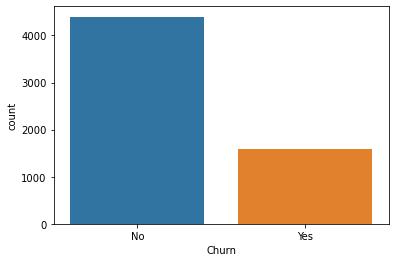

In [17]:
# Checking whether or not the data is balanced.

sns.countplot(data=new_data,x='Churn')

  
   ### The data is imbalanced

### Dstribution of Numerical dataset

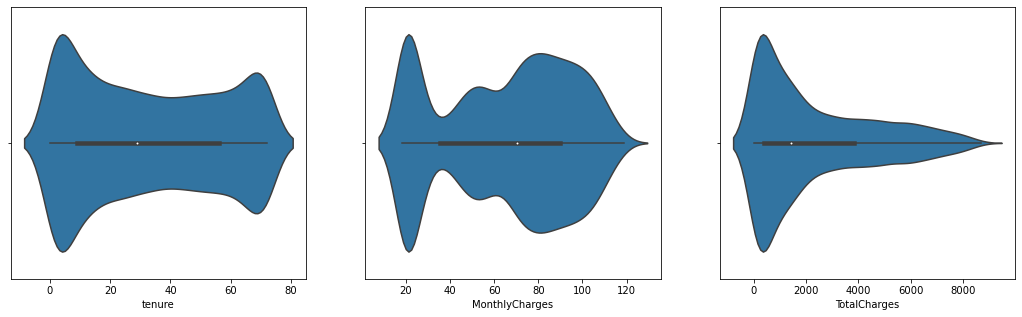

In [18]:
fig,axes = plt.subplots(1,3,figsize=(18,5))

numerical_col = new_data.columns[(new_data.dtypes!='category')]

for i ,col in enumerate(numerical_col):
    sns.violinplot(ax=axes[i],x=new_data[col])

### How each of them are correlated 

<AxesSubplot:>

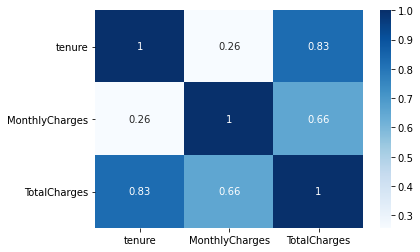

In [19]:
correlation=new_data[numerical_col].corr()
sns.heatmap(correlation,cmap='Blues',annot=True)

### 1. Total Charge is highly correlated tenure and Monthly charge

### To get overall idea about how numerical features are usefull in finding patterns, let's use pair plot

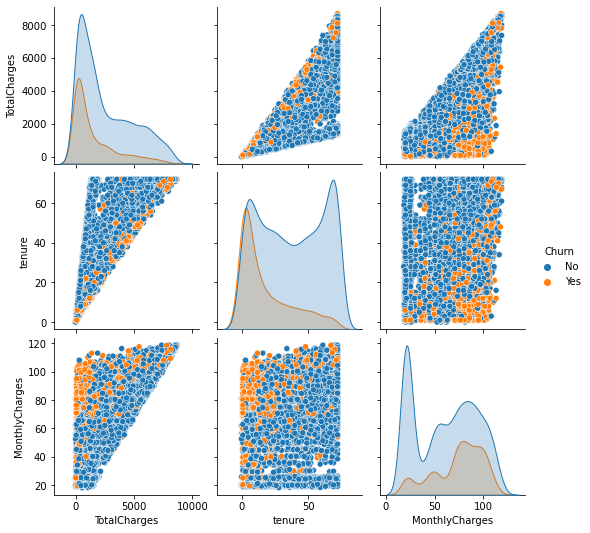

In [20]:
sns.pairplot(data=new_data,vars=['TotalCharges','tenure','MonthlyCharges'],hue='Churn')

# Observations
### 1. Most of the customers leaves within a short period of time 
### 2. Most of the new customers leave the company when they are charged high mothly Charge
### 3. Those who pay high total charge whithin short tenure, tend to leave the company 

# Now let's explore the categorical features

In [21]:
categorical.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='gender', ylabel='MonthlyCharges'>

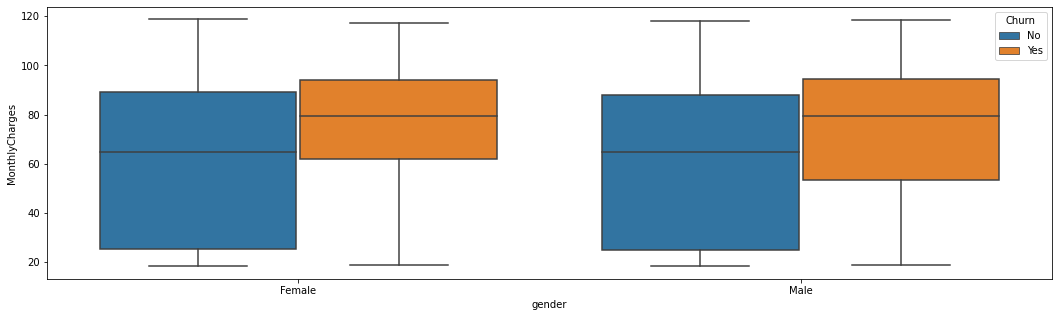

In [22]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.gender,y=new_data.MonthlyCharges,hue=new_data.Churn)

### 1. If the monthly charge is less then the customers are less likely to leave the company
### 2. The churn starts when Monthly charge is greater than 45

<AxesSubplot:xlabel='gender', ylabel='tenure'>

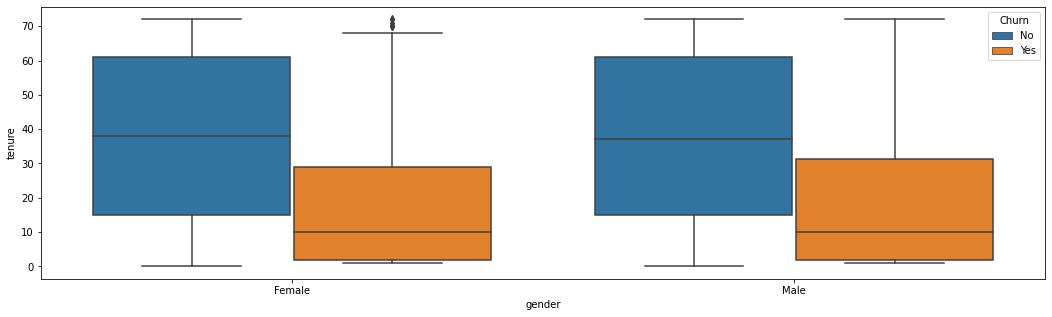

In [23]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.gender,y=new_data.tenure,hue=new_data.Churn)

### Mostly the new customers are more likly to leave the company

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

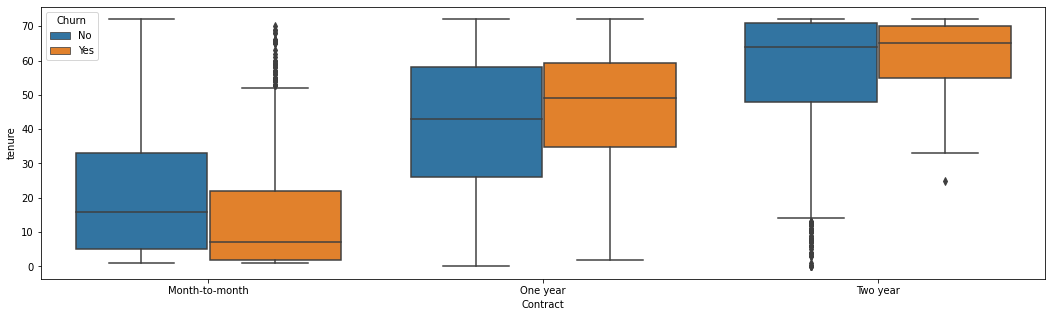

In [24]:
fig = plt.figure(figsize=(18,5))

sns.boxplot(x=new_data.Contract,y=new_data.tenure,hue=new_data.Churn)

<AxesSubplot:xlabel='Contract', ylabel='count'>

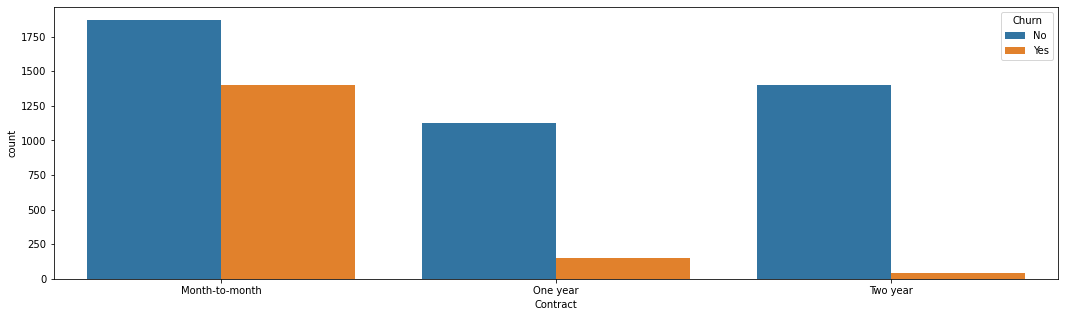

In [165]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.Contract,hue=new_data.Churn)

### People who took month to month contract are more likely to leave the compay than those who have other plans

<AxesSubplot:xlabel='InternetService', ylabel='count'>

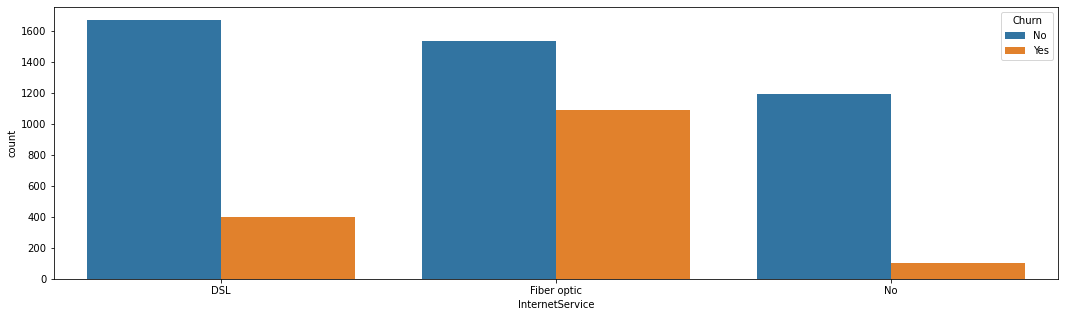

In [172]:
fig = plt.figure(figsize=(18,5))

sns.bar(x=new_data.InternetService,hue=new_data.Churn)

### The Customers who use Fiber optic are more likly to have high churn rate compare to other service users

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

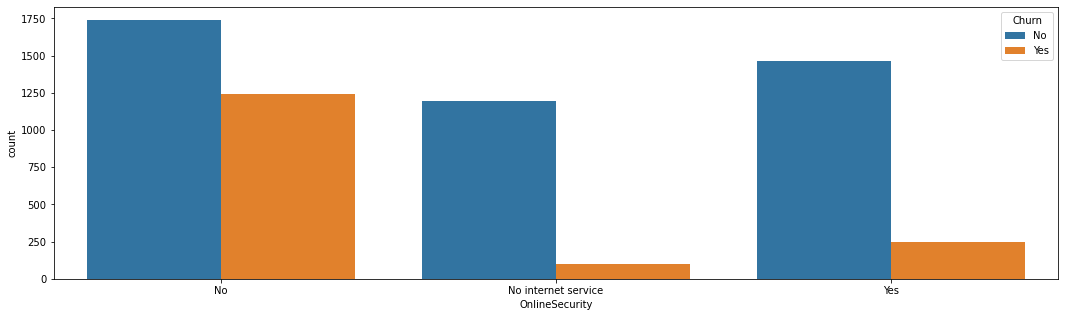

In [173]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.OnlineSecurity,hue=new_data.Churn)

### Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

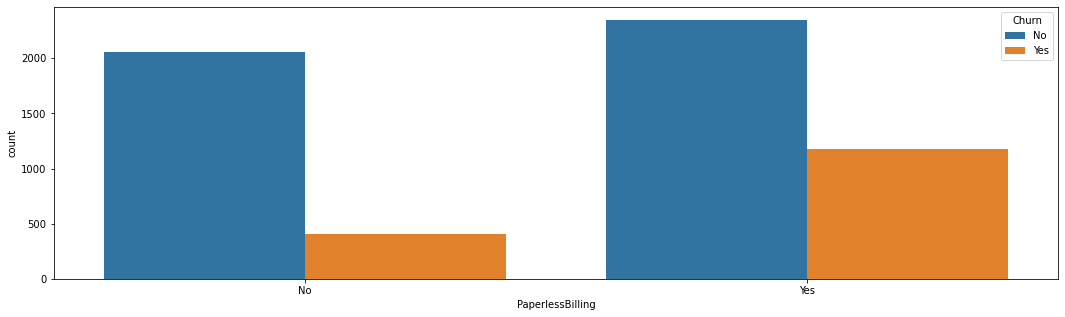

In [181]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaperlessBilling,hue=new_data.Churn)

### Those who pay bill using paperless payment tend to leave the company

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

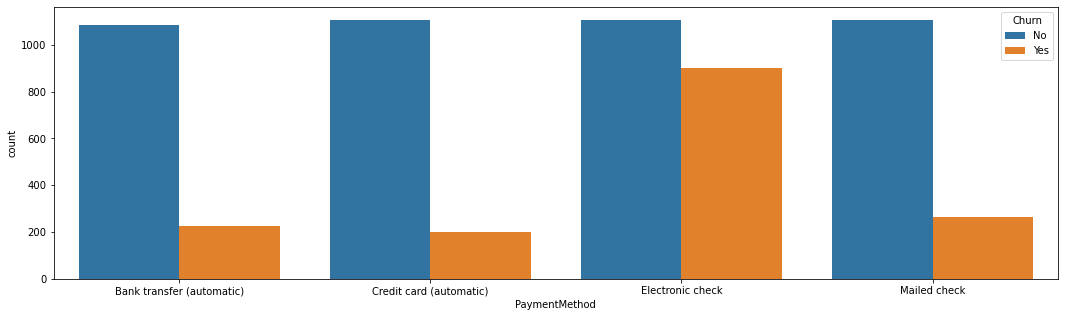

In [182]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

### Those who use electronic check for payment tend to leave the company

In [ ]:
fig = plt.figure(figsize=(18,5))

sns.countplot(x=new_data.PaymentMethod,hue=new_data.Churn)

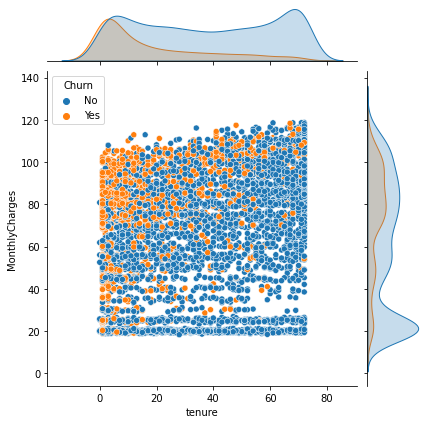

In [185]:
sns.jointplot(x='tenure',y='MonthlyCharges',data=new_data,hue='Churn')

### If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company

<AxesSubplot:xlabel='Partner', ylabel='tenure'>

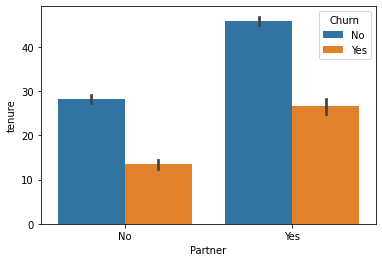

In [192]:
sns.barplot(x='Partner',y='tenure',data=new_data,hue='Churn')

# Finalizing the findings

### 0.Mostly the new customers are more likly to leave the company
### 1.Total Charge is highly correlated tenure and Monthly charge
### 2. Most of the customers leaves within a short period of time 
### 3. Most of the new customers leave the company when they are charged high mothly Charge
### 4. Those who pay high total charge whithin short tenure, tend to leave the company  
### 5. If the monthly charge is less then the customers are less likely to leave the company
### 6. The churn starts when the Monthly charge is greater than 45
### 7.People who took month to month contract are more likely to leave the compay than those who have other plans
### 8.The Customers who use Fiber optic are more likly to have high churn rate compare to other service users
### 9.Those who do not have Online security/OnlineBackup/DeviceProtection/TechSupport tend to leave the company 
### 10.Those who pay bill using paperless payment seem to have high churn rate
### 11.Those who use electronic check for payment tend to leave the company
### 12.If the tenure is less and Monthly charge is also less then those customers are less likely to leave the company
### 13. The data is not balanced